# IS362 - Project 2

The goal of this assignment is to give you practice in preparing different datasets for downstream analysis work.

Your task is to:

(1) Choose any three of the “wide” datasets identified in the Week 5 Discussion items. (You may use your own dataset; please don’t use my Sample Post dataset, since that was used in your Project 1 assignment!) For each of the three chosen datasets:

• Create a .CSV file (or optionally, a MySQL database!) that includes all of the information
  included in the dataset. You’re encouraged to use a “wide” structure similar to how the
  information appears in the discussion item, so that you can practice tidying and
  transformations as described below.
• Read the information from your .CSV file into Python, and use pandas as needed to tidy
  and transform your data. [Most of your grade will be based on this step!]
• Perform the analysis requested in the discussion item.
• Your code should be in an Jupyter Notebook, posted to your GitHub repository, and
  should include narrative descriptions of your data cleanup work, analysis, and
  conclusions.
  
(2) Please include the URL for the Jupyter Notebook in your homework submission, for each of the three chosen datasets. You may create a single Jupyter Notebook, or three separate notebooks.

In [94]:
import pandas as pd
import numpy as np

## First Dataset - Offenses Reported to Law Enforcement

First we'll tidy up the data and then figure out the total number of crimes for each crime category and compare it from year 2016 to 2017.

Data is found here:  [Preliminary report](https://ucr.fbi.gov/crime-in-the-u.s/2017/preliminary-report)

In [26]:
offense = pd.read_csv('Offenses.csv')
offense.head()

,Table 4,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,January to June 2016–2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Reported to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by State by City 100,000 and over in population",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,State,City,NaN,Population1,Violent\ncrime,Murder,Rape2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,NaN,NaN,NaN,NaN
4,ALABAMA,BIRMINGHAM,2016.0,"212,549","1,732",44,75,460,"1,153","5,875","1,318","3,807",750,76,NaN,NaN,NaN,NaN


In [28]:
# We don't need the data on the first 4 indexes so we will drop it.

offense.drop(offense.index[[0, 1, 2, 3]], inplace=True)

In [29]:
offense.head()

,Table 4,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
4,ALABAMA,BIRMINGHAM,2016.0,"212,549","1,732",44,75,460,"1,153","5,875","1,318","3,807",750,76,NaN,NaN,NaN,NaN
5,NaN,NaN,2017.0,NaN,"1,829",42,92,472,"1,223","6,458","1,292","4,350",816,NaN,NaN,NaN,NaN,NaN
6,NaN,MOBILE4,2016.0,"249,921",793,18,47,181,547,"5,169","1,100","3,724",345,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,2017.0,NaN,925,20,53,235,617,"6,482","1,507","4,344",631,NaN,NaN,NaN,NaN,NaN
8,NaN,MONTGOMERY,2016.0,"199,565",563,18,42,187,316,"4,229","1,043","2,790",396,NaN,NaN,NaN,NaN,NaN


In [31]:
# We will drop columns 14 to 17

offense.drop('Unnamed: 14', axis=1, inplace=True)
offense.drop('Unnamed: 15', axis=1, inplace=True)
offense.drop('Unnamed: 16', axis=1, inplace=True)
offense.drop('Unnamed: 17', axis=1, inplace=True)

In [32]:
offense.head()

,Table 4,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
4,ALABAMA,BIRMINGHAM,2016.0,"212,549","1,732",44,75,460,"1,153","5,875","1,318","3,807",750,76
5,NaN,NaN,2017.0,NaN,"1,829",42,92,472,"1,223","6,458","1,292","4,350",816,NaN
6,NaN,MOBILE4,2016.0,"249,921",793,18,47,181,547,"5,169","1,100","3,724",345,NaN
7,NaN,NaN,2017.0,NaN,925,20,53,235,617,"6,482","1,507","4,344",631,NaN
8,NaN,MONTGOMERY,2016.0,"199,565",563,18,42,187,316,"4,229","1,043","2,790",396,NaN


In [35]:
# Looks at the end of the dataset. The last few rows, we won't need.
offense.tail(20)

,Table 4,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
469,NaN,NaN,2017.0,NaN,304,6,68,61,169,"2,640",364,"1,757",519,24
470,WISCONSIN,GREEN BAY,2016.0,"105,452",262,1,45,30,186,"1,014",177,808,29,4
471,NaN,NaN,2017.0,NaN,201,0,33,26,142,902,138,733,31,7
472,NaN,KENOSHA6,2016.0,"99,954",NaN,0,NaN,58,113,"1,042",206,795,41,3
473,NaN,NaN,2017.0,NaN,176,4,28,51,93,891,165,680,46,3
474,NaN,MADISON,2016.0,"252,136",398,6,59,105,228,"3,253",440,"2,651",162,8
475,NaN,NaN,2017.0,NaN,483,16,37,108,322,"3,229",434,"2,637",158,4
476,NaN,MILWAUKEE,2016.0,"600,193","4,485",55,252,"1,545","2,633","11,506","2,385","6,140","2,981",120
477,NaN,NaN,2017.0,NaN,"4,539",55,232,"1,334","2,918","10,595","2,696","5,400","2,499",135
478,1 The 2016 population figures are FBI estimate...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Deletes the last 10 rows

offense.drop(offense.index[-11:], inplace=True)

In [40]:
offense.tail()

,Table 4,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
473,NaN,NaN,2017.0,NaN,176,4,28,51,93,891,165,680,46,3
474,NaN,MADISON,2016.0,"252,136",398,6,59,105,228,"3,253",440,"2,651",162,8
475,NaN,NaN,2017.0,NaN,483,16,37,108,322,"3,229",434,"2,637",158,4
476,NaN,MILWAUKEE,2016.0,"600,193","4,485",55,252,"1,545","2,633","11,506","2,385","6,140","2,981",120
477,NaN,NaN,2017.0,NaN,"4,539",55,232,"1,334","2,918","10,595","2,696","5,400","2,499",135


In [43]:
# Returns column names

offense.columns

Index(['Table 4', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [45]:
# Rename the column names

offense.rename(columns = {'Table 4': 'State', 'Unnamed: 1': 'City', 'Unnamed: 2': 'Year', 'Unnamed: 3': 'Population',
                          'Unnamed: 4': 'Violent Crime', 'Unnamed: 5': 'Murder', 'Unnamed: 6': 'Rape',
                          'Unnamed: 7': 'Robbery', 'Unnamed: 8': 'Aggravated Assault', 'Unnamed: 9': 'Property Crime',
                          'Unnamed: 10': 'Burglary', 'Unnamed: 11': 'Larceny Theft', 'Unnamed: 12': 'Motor Vehicle Theft',
                          'Unnamed: 13': 'Arson'}, inplace=True)

In [46]:
# Checks to see if the columns were renamed successfully.

offense.head()

,State,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny Theft,Motor Vehicle Theft,Arson
4,ALABAMA,BIRMINGHAM,2016.0,"212,549","1,732",44,75,460,"1,153","5,875","1,318","3,807",750,76
5,NaN,NaN,2017.0,NaN,"1,829",42,92,472,"1,223","6,458","1,292","4,350",816,NaN
6,NaN,MOBILE4,2016.0,"249,921",793,18,47,181,547,"5,169","1,100","3,724",345,NaN
7,NaN,NaN,2017.0,NaN,925,20,53,235,617,"6,482","1,507","4,344",631,NaN
8,NaN,MONTGOMERY,2016.0,"199,565",563,18,42,187,316,"4,229","1,043","2,790",396,NaN


In [47]:
# Returns the number of rows and columns in the dataset.

offense.shape

(474, 14)

In [51]:
# Need to rename columns that contains a space with an underscore

offense.rename(columns={'Violent Crime': 'Violent_Crime', 'Aggravated Assault': 'Aggravated_Assault',
                        'Property Crime': 'Property_Crime', 'Larceny Theft': 'Larceny_Theft',
                        'Motor Vehicle Theft': 'Motor_Vehicle_Theft'}, inplace=True)

In [52]:
# Checks if column names changed successfully.

offense.columns

Index(['State', 'City', 'Year', 'Population', 'Violent_Crime', 'Murder',
       'Rape', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary',
       'Larceny_Theft', 'Motor_Vehicle_Theft', 'Arson'],
      dtype='object')

In [57]:
# Returns the summary statistics for numerical columns

offense.describe()

,Year
count,474.000000
mean,2016.500000
std,0.500528
min,2016.000000
25%,2016.000000
50%,2016.500000
75%,2017.000000
max,2017.000000


In [58]:
# Returns index, datatype, and memory information

offense.info()

# Output shows that only the information in column Year is a float.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 4 to 477
Data columns (total 14 columns):
State                  43 non-null object
City                   238 non-null object
Year                   474 non-null float64
Population             237 non-null object
Violent_Crime          449 non-null object
Murder                 474 non-null object
Rape                   449 non-null object
Robbery                474 non-null object
Aggravated_Assault     474 non-null object
Property_Crime         472 non-null object
Burglary               474 non-null object
Larceny_Theft          474 non-null object
Motor_Vehicle_Theft    472 non-null object
Arson                  455 non-null object
dtypes: float64(1), object(13)
memory usage: 55.5+ KB


In [67]:
# Change data types for columns that needs to be a number (from object to int).

offense['Year'] = offense.Year.astype(int)
offense['Population'] = offense.Population.astype(int)
offense['Violent_Crime'] = offense.Violent_Crime.astype(int)

# Tried to change some of the columns first. When I ran it, gave a ValueError.  Some of the numbers contains a comma
# which needs to be removed first.


ValueError: invalid literal for int() with base 10: '212,549'

In [64]:
offense.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 4 to 477
Data columns (total 14 columns):
State                  43 non-null object
City                   238 non-null object
Year                   474 non-null int32
Population             237 non-null object
Violent_Crime          449 non-null object
Murder                 474 non-null object
Rape                   449 non-null object
Robbery                474 non-null object
Aggravated_Assault     474 non-null object
Property_Crime         472 non-null object
Burglary               474 non-null object
Larceny_Theft          474 non-null object
Motor_Vehicle_Theft    472 non-null object
Arson                  455 non-null object
dtypes: int32(1), object(13)
memory usage: 53.7+ KB


In [84]:
# Change NaNs to 0

offense.fillna(0, inplace=True)

#offense['Population'] = offense['Population'].str.replace(',', '')
#offense['Population'] = offense['Population'].astype(int)
offense.head()

,State,City,Year,Population,Violent_Crime,Murder,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson
4,ALABAMA,BIRMINGHAM,2016,212549,1732,44,75,460,1153,5875,1318,3807,750,76
5,0,0,2017,0,1829,42,92,472,1223,6458,1292,4350,816,0
6,0,MOBILE4,2016,249921,793,18,47,181,547,5169,1100,3724,345,0
7,0,0,2017,0,925,20,53,235,617,6482,1507,4344,631,0
8,0,MONTGOMERY,2016,199565,563,18,42,187,316,4229,1043,2790,396,0


In [80]:
# Replacing all commas in the rest of the columns to an empty string

offense['Violent_Crime'] = offense.Violent_Crime.str.replace(',', '')
offense['Murder'] = offense.Murder.str.replace(',', '')
offense['Rape'] = offense.Rape.str.replace(',', '')
offense['Robbery'] = offense.Robbery.str.replace(',', '')
offense['Aggravated_Assault'] = offense.Aggravated_Assault.str.replace(',', '')
offense['Property_Crime'] = offense.Property_Crime.str.replace(',', '')
offense['Burglary'] = offense.Burglary.str.replace(',', '')
offense['Larceny_Theft'] = offense.Larceny_Theft.str.replace(',', '')
offense['Motor_Vehicle_Theft'] = offense.Motor_Vehicle_Theft.str.replace(',', '')
offense['Arson'] = offense.Arson.str.replace(',', '')

In [86]:
# Change the data type for the rest of the columns from object to int

offense['Violent_Crime'] = offense.Violent_Crime.astype(int)
offense['Murder'] = offense.Murder.astype(int)
offense['Rape'] = offense.Rape.astype(int)
offense['Robbery'] = offense.Robbery.astype(int)
offense['Aggravated_Assault'] = offense.Aggravated_Assault.astype(int)
offense['Property_Crime'] = offense.Property_Crime.astype(int)
offense['Burglary'] = offense.Burglary.astype(int)
offense['Larceny_Theft'] = offense.Larceny_Theft.astype(int)
offense['Motor_Vehicle_Theft'] = offense.Motor_Vehicle_Theft.astype(int)
offense['Arson'] = offense.Arson.astype(int)

In [87]:
# Check if datatype was changed successfully.

offense.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 4 to 477
Data columns (total 14 columns):
State                  474 non-null object
City                   474 non-null object
Year                   474 non-null int32
Population             474 non-null int32
Violent_Crime          474 non-null int32
Murder                 474 non-null int32
Rape                   474 non-null int32
Robbery                474 non-null int32
Aggravated_Assault     474 non-null int32
Property_Crime         474 non-null int32
Burglary               474 non-null int32
Larceny_Theft          474 non-null int32
Motor_Vehicle_Theft    474 non-null int32
Arson                  474 non-null int32
dtypes: int32(12), object(2)
memory usage: 53.3+ KB


In [122]:
offense_year = offense.groupby('Year').agg(np.sum)

In [120]:
offense_year.head()

,Violent_Crime,Murder,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson
Year,,,,,,,,,,
2016,219685,3182,17740,74878,135829,1102591,193567,770959,140450,6690
2017,223139,3409,17905,73085,135896,1096360,187800,766223,144722,6457


In [98]:
%matplotlib inline

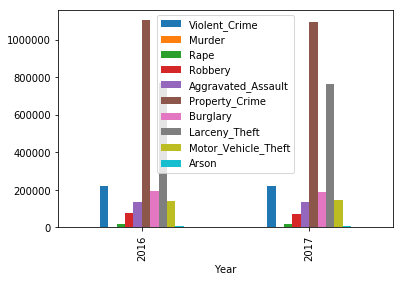

In [121]:
#offense2 = offense.drop('Population', axis=1, inplace=True)
offense_year.plot(kind='bar')

### Conclusion

Looking at the graph, it looks like there isn't much difference in the total of number of crimes in each category.  According to the preliminary report, the figures only showed an overall decrease of 0.8 percent for the first 6 months of 2017 when compared with figures reported for the same time in 2016.

##   Second Dataset  - Survival of Passengers on the Titanic

This dataset contains information of passengers of the Titanic. 

Data can be found here: [Titanic data](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/Titanic.csv)

As requested on the discussion post in regards to this data, we'll answer the following:

1. find average of provided ages 
2. find out if more men or women survived (based on this data alone)
3. what class had the most survivors

In [170]:
titanic = pd.read_csv('Titanic2.csv')
titanic.head()

,Unnamed: 0,Class,Sex,Age,Survived,Freq
0,1,1st,Male,Child,No,0
1,2,2nd,Male,Child,No,0
2,3,3rd,Male,Child,No,35
3,4,Crew,Male,Child,No,0
4,5,1st,Female,Child,No,0


In [171]:
# Find average age of passengers

titanic['Freq'].mean()

68.78125

In [167]:
# Find out how many male survivors

#test = titanic[titanic.Survived == 'Yes'].Sex.groupby(['Sex']).sum()

titanic[(titanic.Survived == 'Yes') & (titanic.Sex == 'Male')].count()

Unnamed: 0    8
Class         8
Sex           8
Age           8
Survived      8
Freq          8
dtype: int64

In [168]:
# Find out how many female survivors

titanic[(titanic.Survived == "Yes") & (titanic.Sex == 'Female')].count()

Unnamed: 0    8
Class         8
Sex           8
Age           8
Survived      8
Freq          8
dtype: int64

The first output is 8 male survivors and the second output is 8 female survivors, therefore, there was the same amount of male and female survivors of the Titanic.

In [183]:
# Find out which class had the most survivors

graph = titanic[(titanic.Survived == 'Yes')].groupby('Class')['Class'].count()
graph

Class
1st     4
2nd     4
3rd     4
Crew    4
Name: Class, dtype: int64

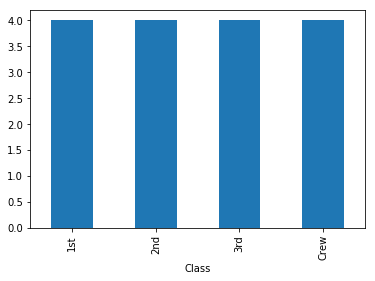

In [184]:
graph.plot(kind='bar')

### Conclusion

The given data seems like a made up one so unfortunately, the analyzing the data wasn't worthwile.  Here are the answers to questions posted after analyzing it:

1. find average of provided ages - 68.78125
2. find out if more men or women survived (based on this data alone) - 8 men and 8 women
3. what class had the most survivors - It was a tie between the 1st, 2nd, 3rd, and crew classes with 4 survivors each

## Third Dataset - Online Ticket Sales

This data set shows the event names, dates, venue where the event took place, etc. We will analzye this data in hopes to answering the following question that were posted on the discussion board post.

1. find which event draws the most sales

In [196]:
import chardet

with open('sales.csv', 'rb') as f:
    result = chardet.detect(f.read())
sales = pd.read_csv('sales.csv', encoding=result['encoding'])

# I was getting an error - UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf8 in position 22: invalid start byte

sales.head()

,Unnamed: 0,event_id,primary_act_id,secondary_act_id,purch_party_lkup_id,event_name,primary_act_name,secondary_act_name,major_cat_name,minor_cat_name,...,edu_1st_indv_val,edu_2nd_indv_val,adults_in_hh_num,married_ind,child_present_ind,home_owner_ind,occpn_val,occpn_1st_val,occpn_2nd_val,dist_to_ven
0,1,abcaf1adb99a935fc661,43f0436b905bfa7c2eec,b85143bf51323b72e53c,7dfa56dd7d5956b17587,Xfinity Center Mansfield Premier Parking: Flor...,XFINITY Center Mansfield Premier Parking,NaN,MISC,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6c56d7f08c95f2aa453c,1a3e9aecd0617706a794,f53529c5679ea6ca5a48,4f9e6fc637eaf7b736c2,Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,Dave Matthews Band,MISC,CAMPING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
2,3,c7ab4524a121f9d687d2,4b677c3f5bec71eec8d1,b85143bf51323b72e53c,6c2545703bd527a7144d,Dodge Theatre Adams Street Parking - benise,Parking Event,NaN,MISC,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,394cb493f893be9b9ed1,b1ccea01ad6ef8522796,b85143bf51323b72e53c,527d6b1eaffc69ddd882,Gexa Energy Pavilion Vip Parking : kid rock wi...,Gexa Energy Pavilion VIP Parking,NaN,MISC,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,55b5f67e618557929f48,91c03a34b562436efa3c,b85143bf51323b72e53c,8bd62c394a35213bdf52,Premier Parking - motley crue,White River Amphitheatre Premier Parking,NaN,MISC,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
# Returns all the column names

sales.columns

Index(['Unnamed: 0', 'event_id', 'primary_act_id', 'secondary_act_id',
       'purch_party_lkup_id', 'event_name', 'primary_act_name',
       'secondary_act_name', 'major_cat_name', 'minor_cat_name',
       'la_event_type_cat', 'event_disp_name', 'ticket_text',
       'tickets_purchased_qty', 'trans_face_val_amt', 'delivery_type_cd',
       'event_date_time', 'event_dt', 'presale_dt', 'onsale_dt',
       'sales_ord_create_dttm', 'sales_ord_tran_dt', 'print_dt', 'timezn_nm',
       'venue_city', 'venue_state', 'venue_postal_cd_sgmt_1',
       'sales_platform_cd', 'print_flg', 'la_valid_tkt_event_flg',
       'fin_mkt_nm', 'web_session_cookie_val', 'gndr_cd', 'age_yr',
       'income_amt', 'edu_val', 'edu_1st_indv_val', 'edu_2nd_indv_val',
       'adults_in_hh_num', 'married_ind', 'child_present_ind',
       'home_owner_ind', 'occpn_val', 'occpn_1st_val', 'occpn_2nd_val',
       'dist_to_ven'],
      dtype='object')

In [199]:
# Remove columns we don't need

sales.drop('event_id', axis=1, inplace=True)
sales.drop('primary_act_id', axis=1, inplace=True)
sales.drop('secondary_act_id', axis=1, inplace=True)
sales.drop('purch_party_lkup_id', axis=1, inplace=True)
sales.drop('secondary_act_name', axis=1, inplace=True)
sales.drop('ticket_text', axis=1, inplace=True)
sales.drop('delivery_type_cd', axis=1, inplace=True)
sales.drop('presale_dt', axis=1, inplace=True)
sales.drop('onsale_dt', axis=1, inplace=True)
sales.drop('print_dt', axis=1, inplace=True)
sales.drop('timezn_nm', axis=1, inplace=True)
sales.drop('venue_postal_cd_sgmt_1', axis=1, inplace=True)
sales.drop('sales_platform_cd', axis=1, inplace=True)
sales.drop('print_flg', axis=1, inplace=True)
sales.drop('la_valid_tkt_event_flg', axis=1, inplace=True)
sales.drop('web_session_cookie_val', axis=1, inplace=True)
sales.drop('gndr_cd', axis=1, inplace=True)
sales.drop('age_yr', axis=1, inplace=True)
sales.drop('income_amt', axis=1, inplace=True)
sales.drop('edu_val', axis=1, inplace=True)
sales.drop('edu_1st_indv_val',axis=1, inplace=True)
sales.drop('edu_2nd_indv_val', axis=1, inplace=True)
sales.drop('adults_in_hh_num', axis=1, inplace=True)
sales.drop('married_ind', axis=1, inplace=True)
sales.drop('child_present_ind', axis=1, inplace=True)
sales.drop('home_owner_ind', axis=1, inplace=True)
sales.drop('occpn_val', axis=1, inplace=True)
sales.drop('occpn_1st_val', axis=1, inplace=True)
sales.drop('occpn_2nd_val', axis=1, inplace=True)
sales.drop('dist_to_ven', axis=1, inplace=True)

In [200]:
sales.head()

,Unnamed: 0,event_name,primary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,event_disp_name,tickets_purchased_qty,trans_face_val_amt,event_date_time,event_dt,sales_ord_create_dttm,sales_ord_tran_dt,venue_city,venue_state,fin_mkt_nm
0,1,Xfinity Center Mansfield Premier Parking: Flor...,XFINITY Center Mansfield Premier Parking,MISC,PARKING,PARKING,Xfinity Center Mansfield Premier Parking: Flor...,1,45.0,2015-09-12 23:30:00,2015-09-12,2015-09-11 18:17:45,2015-09-11,MANSFIELD,MASSACHUSETTS,Boston
1,2,Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,MISC,CAMPING,INVALID,Gorge Camping - dave matthews band - sept 3-7,1,75.0,2009-09-05 01:00:00,2009-09-04,2009-07-06 00:00:00,2009-07-05,QUINCY,WASHINGTON,Seattle
2,3,Dodge Theatre Adams Street Parking - benise,Parking Event,MISC,PARKING,PARKING,Dodge Theatre Adams Street Parking - benise,1,5.0,2006-04-22 01:30:00,2006-04-21,2006-04-05 00:00:00,2006-04-05,PHOENIX,ARIZONA,Arizona
3,4,Gexa Energy Pavilion Vip Parking : kid rock wi...,Gexa Energy Pavilion VIP Parking,MISC,PARKING,PARKING,Gexa Energy Pavilion Vip Parking : kid rock wi...,1,20.0,2011-09-03 00:00:00,2011-09-02,2011-07-01 17:38:50,2011-07-01,DALLAS,TEXAS,Dallas
4,5,Premier Parking - motley crue,White River Amphitheatre Premier Parking,MISC,PARKING,PARKING,Premier Parking - motley crue,1,20.0,2005-07-31 01:00:00,2005-07-30,2005-06-18 00:00:00,2005-06-18,AUBURN,WASHINGTON,Seattle


In [201]:
sales.shape

(5000, 16)

In [206]:
# Delete Unnamed: 0 column

sales.drop('Unnamed: 0', axis=1, inplace=True)

In [211]:
sales.head()

,event_name,primary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,event_disp_name,tickets_purchased_qty,trans_face_val_amt,event_date_time,event_dt,sales_ord_create_dttm,sales_ord_tran_dt,venue_city,venue_state,fin_mkt_nm
2,Dodge Theatre Adams Street Parking - benise,Parking Event,MISC,PARKING,PARKING,Dodge Theatre Adams Street Parking - benise,1,5.0,2006-04-22 01:30:00,2006-04-21,2006-04-05 00:00:00,2006-04-05,PHOENIX,ARIZONA,Arizona
3,Gexa Energy Pavilion Vip Parking : kid rock wi...,Gexa Energy Pavilion VIP Parking,MISC,PARKING,PARKING,Gexa Energy Pavilion Vip Parking : kid rock wi...,1,20.0,2011-09-03 00:00:00,2011-09-02,2011-07-01 17:38:50,2011-07-01,DALLAS,TEXAS,Dallas
4,Premier Parking - motley crue,White River Amphitheatre Premier Parking,MISC,PARKING,PARKING,Premier Parking - motley crue,1,20.0,2005-07-31 01:00:00,2005-07-30,2005-06-18 00:00:00,2005-06-18,AUBURN,WASHINGTON,Seattle
5,Fast Lane Access: Journey,Fast Lane Access,MISC,SPECIAL ENTRY (UPSELL),UPSELL,Fast Lane Access: Journey,2,10.0,2012-07-22 02:00:00,2012-07-21,2012-07-21 17:20:18,2012-07-21,SAN BERNARDINO,CALIFORNIA,Los Angeles
6,Phil Lesh & friends-pnc bank arts center holmd...,PNC Bank Arts Center Holmdel Premier Parking,MISC,PARKING,PARKING,Phil Lesh & friends-pnc bank arts center holmd...,1,30.0,2006-07-01 20:30:00,2006-07-01,2006-06-16 00:00:00,2006-06-16,HOLMDEL,NEW JERSEY,New York


In [212]:
# Create a dataframe without "parking"

sales[sales.minor_cat_name != 'PARKING']

,event_name,primary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,event_disp_name,tickets_purchased_qty,trans_face_val_amt,event_date_time,event_dt,sales_ord_create_dttm,sales_ord_tran_dt,venue_city,venue_state,fin_mkt_nm
5,Fast Lane Access: Journey,Fast Lane Access,MISC,SPECIAL ENTRY (UPSELL),UPSELL,Fast Lane Access: Journey,2,10.00,2012-07-22 02:00:00,2012-07-21,2012-07-21 17:20:18,2012-07-21,SAN BERNARDINO,CALIFORNIA,Los Angeles
9,Shlohmo,Shlohmo,CONCERTS,DANCE MUSIC/DANCE,CONCERTS,Shlohmo,1,25.00,2015-05-01 03:00:00,2015-04-30,2015-04-28 07:07:40,2015-04-27,SAN FRANCISCO,CALIFORNIA,N. California
11,Blake Shelton: Presented By Gildan,Blake Shelton,CONCERTS,COUNTRY,CONCERTS,Blake Shelton: Presented By Gildan,2,90.00,2016-02-21 00:30:00,2016-02-20,2015-12-09 15:08:33,2015-12-09,AUBURN HILLS,MICHIGAN,Michigan
12,Skip The Line: Pierce The Line/all Time Low,Live Nation C-T Upsells - Special Access,MISC,SPECIAL ENTRY (UPSELL),UPSELL,Skip The Line: Pierce The Line/all Time Low,4,40.00,2013-04-14 23:30:00,2013-04-14,2013-01-28 18:33:49,2013-01-28,HOUSTON,TEXAS,Houston
16,Lindsey Stirling: The Music Box Tour,Lindsey Stirling,CONCERTS,ROCK/POP,CONCERTS,Lindsey Stirling: The Music Box Tour,2,70.00,2015-06-10 00:00:00,2015-06-09,2015-06-01 20:52:50,2015-06-01,CLEVELAND,OHIO,Cleveland
21,Skip The Line: Maroon 5/kelly clarkson,Fast Lane Access,MISC,SPECIAL ENTRY (UPSELL),UPSELL,Skip The Line: Maroon 5/kelly clarkson,4,40.00,2013-08-31 23:00:00,2013-08-31,2013-04-06 14:16:22,2013-04-06,HARTFORD,CONNECTICUT,Boston
22,Vip Fast Lane: Dave Matthews Band,Vip Fast Lane,MISC,CONCESSION VOUCHERS (UPSELL),UPSELL,Vip Fast Lane: Dave Matthews Band,2,10.00,2010-06-30 23:00:00,2010-06-30,2010-06-10 00:00:00,2010-06-09,CAMDEN,NEW JERSEY,Delaware Valley
25,The Lawn At White River Vip Fast Lane: Moody B...,Vip Fast Lane,MISC,CONCESSION VOUCHERS (UPSELL),UPSELL,The Lawn At White River Vip Fast Lane: Moody B...,2,10.00,2010-06-23 23:30:00,2010-06-23,2010-05-21 00:00:00,2010-05-21,INDIANAPOLIS,INDIANA,Indiana-Ohio
26,Godsmack,Godsmack,CONCERTS,ALTERNATIVE ROCK,CONCERTS,Godsmack,1,45.00,2015-04-18 01:00:00,2015-04-17,2015-04-16 22:58:56,2015-04-16,DALLAS,TEXAS,Dallas
27,Old National Centre Bottomless Soda: Childish ...,Fantastic Meal Voucher,MISC,DINNER PACKAGES (UPSELL),UPSELL,Old National Centre Bottomless Soda: Childish ...,1,6.50,2012-06-16 00:00:00,2012-06-15,2012-06-12 02:56:00,2012-06-11,INDIANAPOLIS,INDIANA,Indiana-Ohio


In [213]:
sales.shape

(4998, 15)

In [214]:
sales.head()

,event_name,primary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,event_disp_name,tickets_purchased_qty,trans_face_val_amt,event_date_time,event_dt,sales_ord_create_dttm,sales_ord_tran_dt,venue_city,venue_state,fin_mkt_nm
2,Dodge Theatre Adams Street Parking - benise,Parking Event,MISC,PARKING,PARKING,Dodge Theatre Adams Street Parking - benise,1,5.0,2006-04-22 01:30:00,2006-04-21,2006-04-05 00:00:00,2006-04-05,PHOENIX,ARIZONA,Arizona
3,Gexa Energy Pavilion Vip Parking : kid rock wi...,Gexa Energy Pavilion VIP Parking,MISC,PARKING,PARKING,Gexa Energy Pavilion Vip Parking : kid rock wi...,1,20.0,2011-09-03 00:00:00,2011-09-02,2011-07-01 17:38:50,2011-07-01,DALLAS,TEXAS,Dallas
4,Premier Parking - motley crue,White River Amphitheatre Premier Parking,MISC,PARKING,PARKING,Premier Parking - motley crue,1,20.0,2005-07-31 01:00:00,2005-07-30,2005-06-18 00:00:00,2005-06-18,AUBURN,WASHINGTON,Seattle
5,Fast Lane Access: Journey,Fast Lane Access,MISC,SPECIAL ENTRY (UPSELL),UPSELL,Fast Lane Access: Journey,2,10.0,2012-07-22 02:00:00,2012-07-21,2012-07-21 17:20:18,2012-07-21,SAN BERNARDINO,CALIFORNIA,Los Angeles
6,Phil Lesh & friends-pnc bank arts center holmd...,PNC Bank Arts Center Holmdel Premier Parking,MISC,PARKING,PARKING,Phil Lesh & friends-pnc bank arts center holmd...,1,30.0,2006-07-01 20:30:00,2006-07-01,2006-06-16 00:00:00,2006-06-16,HOLMDEL,NEW JERSEY,New York


In [218]:
# Dropping more unncessary columns

sales.drop(['sales_ord_create_dttm', 'sales_ord_tran_dt'], axis=1, inplace=True)

In [219]:
sales.head()

,event_name,primary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,event_disp_name,tickets_purchased_qty,trans_face_val_amt,event_date_time,event_dt,venue_city,venue_state,fin_mkt_nm
2,Dodge Theatre Adams Street Parking - benise,Parking Event,MISC,PARKING,PARKING,Dodge Theatre Adams Street Parking - benise,1,5.0,2006-04-22 01:30:00,2006-04-21,PHOENIX,ARIZONA,Arizona
3,Gexa Energy Pavilion Vip Parking : kid rock wi...,Gexa Energy Pavilion VIP Parking,MISC,PARKING,PARKING,Gexa Energy Pavilion Vip Parking : kid rock wi...,1,20.0,2011-09-03 00:00:00,2011-09-02,DALLAS,TEXAS,Dallas
4,Premier Parking - motley crue,White River Amphitheatre Premier Parking,MISC,PARKING,PARKING,Premier Parking - motley crue,1,20.0,2005-07-31 01:00:00,2005-07-30,AUBURN,WASHINGTON,Seattle
5,Fast Lane Access: Journey,Fast Lane Access,MISC,SPECIAL ENTRY (UPSELL),UPSELL,Fast Lane Access: Journey,2,10.0,2012-07-22 02:00:00,2012-07-21,SAN BERNARDINO,CALIFORNIA,Los Angeles
6,Phil Lesh & friends-pnc bank arts center holmd...,PNC Bank Arts Center Holmdel Premier Parking,MISC,PARKING,PARKING,Phil Lesh & friends-pnc bank arts center holmd...,1,30.0,2006-07-01 20:30:00,2006-07-01,HOLMDEL,NEW JERSEY,New York


In [230]:
tickets = sales.groupby('event_name').tickets_purchased_qty.sum()
tickets

event_name
""""""""weird Al"""""""" Yankovic - the mandatory world tour          6
(tim Mcgraw) : san manuel amphitheatre vip parking                    1
(train): Pnc Bank Arts Center Holmdel Vip Parking                     1
1 Day Camping For Dave Matthews Band Aug 31                           1
1 Day Gorge Camping For Rush                                          2
1 Day Gorge Camping For The Police                                    1
1 Day Gorge Camping Pass For Jack Johnson Aug 22                      4
105.7 The Point Birthmonth Show Starring: Bullet For My Valentine     2
106.7 Kroq Presents System Of A Down                                  2
1070 The Fan & jmv present: whitesnake                                2
2 Day Gorge Camping For Dave Matthews Band                            1
2 Day Gorge Camping For Dave Matthews Band Aug 30-31                  3
2 Day Gorge Camping For Jack Johnson Aug 21-22                        2
2 Day Gorge Camping For Pearl Jam                    

### Conclusion

Based on the output, Zac Brown Band: Jeckyll + Hyde Tour presented by bai was the most popular event according to the quantity of tickets purchased.